# Reduced order model for a lithium ion cell with uniform reaction rate approximation

## Introduction
This model considers a Li-ion cell connected to an external load in a circuit. We consider that that a 3-dimensional cylindrical cell can be opened up as a sheet of paper of negligible thickness, now also assume that no change in any physical quantity occurs along the width. This turn our 3D system to a 1D one. 

Now according to standard conventions let's assume that our cell consists of **3 regions**, the **-ve electrode**, **the separator** and the **+ve electrode**. Also assume that the cell has collectors at end of either electrode. We'll be having the standard reactions in the +ve and -ve electrodes as below:

*-ve electrode:*

<div align=center>LiC₆ → x.Li⁺ + Li₁₋ₓC₆ + x.e⁻</div>

*+ve electrode:*

<div align=center>x.Li⁺ + LiMO₂ + x.e⁻ → Li₁₊ₓMO₂</div>

With this our system should look like below.

<div align=center><img src="../assets/senthil/li_cell.png"></div>

Assume that we have `x = 0` at the -ve electrode and `x = L` at the +ve electrode, L being the cell length. Length of the regions from left to right being lₙ, lₛ and lₚ respectively.

## Importing necessary libraries
To get started import the CaseStudy's senthil model (as sm for convinence) as that's the model which we're simulating. Also import Gadfly as that's the plotting library we're gonna use. To see the model constants [check here.](../src/senthil/constants/constants.jl)

In [12]:
import CaseStudy.SenthilModel as sm
using Gadfly

set_default_plot_size(800px, 600px)

## Cell Voltage for different cases
In this example we'll be showing the cases of *constant current* and *discrete time-series current*. The first describes all the internal model variables also while the latter just shows you how to calculate the voltage through the necessary steps.

### Constant current case
In this case we'll be taking a cuurent of 1C or 13.5mA over a time range of 3400s with intervals of 1s.

In [13]:
I = 13.5
t = Float64.(0:1:3400)
tspan = 1

1

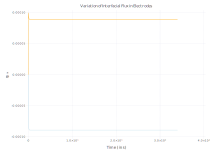

In [14]:

q₂ᵢₖ = sm.InterfacialFlux(t, tspan, I)


plot(
    layer(x=t, y=q₂ᵢₖ.q₂ᵢₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=q₂ᵢₖ.q₂ᵢₚ, Geom.line, color=[colorant"lightblue"]),
    Guide.title("Variation of Interfacial Flux in Electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("q₂ᵢₖ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Interfacial flux in -ve electode: q₂ᵢₙ", 
    #         "Interfacial flux in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "blue"]
    # )
)

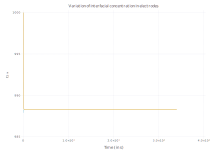

In [15]:
c₂ᵢₖ = sm.InterfacialConc(q₂ᵢₖ)


plot(
    layer(x=t, y=c₂ᵢₖ.c₂ᵢₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₂ᵢₖ.c₂ᵢₚ, Geom.line, color=[colorant"lightblue"]),
    Guide.title("Variation of interfacial concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₂ᵢₖ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Interfacial concentration in -ve electode: q₂ᵢₙ", 
    #         "Interfacial concentration in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "blue"]
    # )
)

x

In [16]:
c₁ₖ = sm.SolidConcentration(t, tspan, I)

plot(
    layer(x=t, y=c₁ₖ.c₁ₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₁ₖ.c₁ₚ, Geom.line),
    Guide.title("Variation of solid concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₁ₖ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Solid concentration in -ve electode: q₂ᵢₙ", 
    #         "Solid concentration in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "blue"]
    # )
)

c₁ₖ.c₁ₚ

3401-element Vector{Float64}:
 22000.0
 22003.75386605441
 22007.507732108817
 22011.261598163226
 22015.015464217635
 22018.769330272044
 22022.523196326452
 22026.27706238086
 22030.03092843527
 22033.78479448968
     ⋮
 34733.11365655437
 34736.86752260878
 34740.62138866319
 34744.3752547176
 34748.129120772006
 34751.882986826415
 34755.63685288082
 34759.39071893523
 34763.14458498964

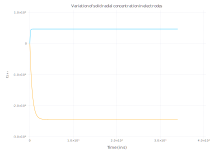

In [17]:
c₁ₖᵣ = sm.SolidRadialConcentration(t, tspan, I)

plot(
    layer(x=t, y=c₁ₖᵣ.c₁ₙᵣ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₁ₖᵣ.c₁ₚᵣ, Geom.line),
    Guide.title("Variation of solid radial concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₁ₖᵣ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Solid radial concentration in -ve electode: q₂ᵢₙ", 
    #         "solid radial concentration in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "blue"]
    # size=Measure[]
    # )
)

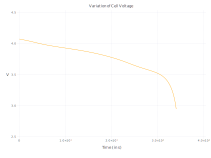

In [19]:
V = sm.V(I, c₁ₖ, c₁ₖᵣ, c₂ᵢₖ, q₂ᵢₖ)

plot(
    layer(x=t, y=V, Geom.line, color=[colorant"orange"]),
    Guide.title("Variation of Cell Voltage"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("V"),
)

### Discrete time series current case